In [2]:
import ecco_v4_py as ecco
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import AxesZero #<= to plot x-axis and y-axis direction
import xarray as xr
import numpy as np
import os
import sys
sys.path.append(r'/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/')
import utils
import cartopy.crs as ccrs
import copy
import cmocean
import cdf_plotter_ojh
import glob 
import json

In [3]:
os.system("pwd")

/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/images/Figure_for_PODAAC


0

0


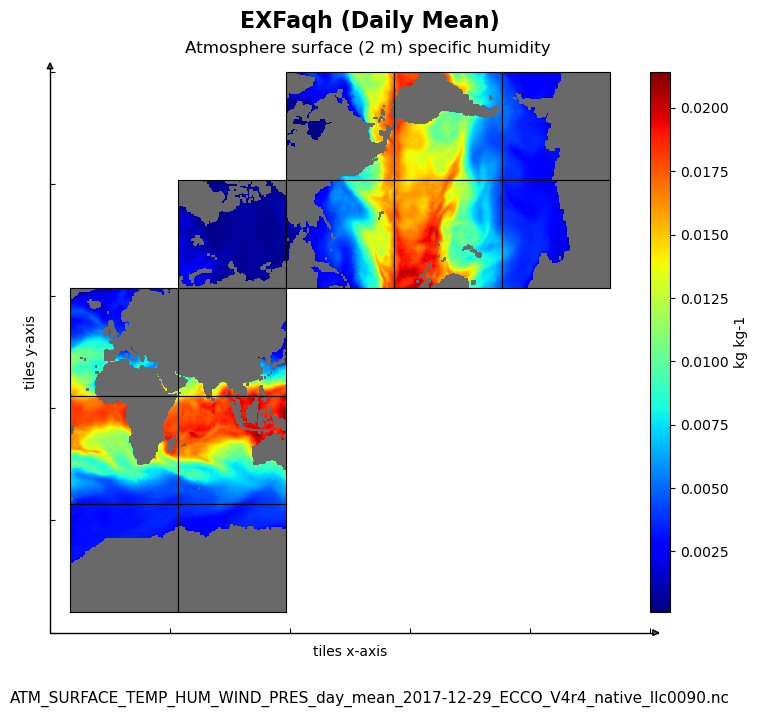

In [4]:
data_source = "../../granule_datasets/natives/"
DataSet_list = sorted(os.listdir(path=data_source))
DataSet_name = []
for i in DataSet_list:
    DataSet_name.append(i[:-3])
# /!\ Testing for the first file#
ij=0
DataSet_input = data_source+DataSet_list[ij]
# For xr.Dataset
DS = xr.open_dataset(DataSet_input)
# For variable list
DataSet_var_list = sorted(DS.data_vars)
ijk = 0
#-------------------------------------#
cdf_plotter_ojh.plot_native(ds=DS, field=DS[DataSet_var_list[ijk]], dataseteName=DataSet_list[ij])

In [18]:
DS

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, tile: 13, time: 1, nv: 2, nb: 4)
Coordinates: (12/13)
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 2017-12-29T12:00:00
    ...         ...
    YC         (tile, j, i) float32 ...
    XG         (tile, j_g, i_g) float32 ...
    YG         (tile, j_g, i_g) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
    XC_bnds    (tile, j, i, nb) float32 ...
    YC_bnds    (tile, j, i, nb) float32 ...
Dimensions without coordinates: nv, nb
Data variables:
    EXFatemp   (time, tile, j, i) float32 ...
    EXFaqh     (time, tile, j, i) float32 ...
    EXFuwind   (time, tile, j, i) float32 ...
    EXFvwind   (time, tile, j, i) float32 ...
    EXFwspee   (time, tile, j, i) float32 ...
    EXFpress   (time, tile, j, i) float32 ...
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1D
    time_coverage_end:            2017-12-30T00:00:00
    time_coverage_resolution:     P1D
    time_coverage_start:          2017-12-29T00:00:00
    title:                        ECCO Atmosphere Surface Temperature, Humidi...
    uuid:                         3525e4c8-404d-11eb-bf7a-0cc47a3f5049

In [5]:
def plot_fig_for_PODAAC(dataType="natives"):
    # Dataset source reading
    if dataType =="natives":
        data_source = "../../granule_datasets/natives/"
    elif dataType == "latlon":
        data_source = "../../granule_datasets/latlon/"
    elif dataType == "oneD":
        data_source = "../../granule_datasets/oneD/"
    else:
        print("Noway! Make your choice in {'natives', 'latlon', 'oneD'}")
            
    # Getting the content of selected dataset type source folder
    DataSet_list = sorted(os.listdir(path=data_source))
    # Getting the na,e of each dataset selected without the extension ".nc"
    # This is to save the plotted figure with the selected dataset name
    DataSet_name = []
    for i in DataSet_list:
        DataSet_name.append(i[:-3])
    # Selection of dataset to plot per variable
    # /!\ Testing for the first file#ij=0
    for ij in np.arange(len(DataSet_name)):
        DataSet_input = data_source+DataSet_list[ij]
        # For xr.Dataset
        DS = xr.open_dataset(DataSet_input)
        # For variable list
        DataSet_var_list = sorted(DS.data_vars)
        # /!\ testing with the first varible# ijk = 0
        for ijk in np.arange(len(DataSet_var_list)):
            if dataType =="natives":
                # plotting with "plot_native"
                cdf_plotter_ojh.plot_native(ds=DS,field=DS[DataSet_var_list[ijk]],
                                            dataseteName=DataSet_list[ij],show_colorbar=True)
            elif dataType == "latlon":
                cdf_plotter_ojh.plot_latlon(ds=DS, field=DS[DataSet_var_list[ijk]],
                                            dataseteName=DataSet_list[ij])
            elif dataType == "oneD":
                cdf_plotter_ojh.plot_oneD(ds=DS, field=DS[DataSet_var_list[ijk]],
                                          dataseteName=DataSet_list[ij])
            else:
                print("Noway! Make your choice in {'natives', 'latlon', 'oneD'}")

            fig_path = 'Figs/'+DataSet_name[ij]+"_var_"+DataSet_var_list[ijk]+"_pic.png"
            plt.savefig(fig_path, dpi=300, facecolor='w', bbox_inches='tight', pad_inches = 0.05)
            plt.close('all')

In [ ]:
# plot_fig_for_PODAAC(dataType="natives")
# plot_fig_for_PODAAC(dataType="latlon")
# plot_fig_for_PODAAC(dataType="oneD")

# Testing function before generalization!

In [6]:
def plot_fig_for_PODAAC_t(dataType="natives"):
    # Dataset source reading
    if dataType =="natives":
        data_source = "../../granule_datasets/natives/"
    elif dataType == "latlon":
        data_source = "../../granule_datasets/latlon/"
    elif dataType == "oneD":
        data_source = "../../granule_datasets/oneD/"
    else:
        print("Noway! Make your choice in {'natives', 'latlon', 'oneD'}")
            
    # Getting the content of selected dataset type source folder
    DataSet_list = sorted(os.listdir(path=data_source))
    # Getting the na,e of each dataset selected without the extension ".nc"
    # This is to save the plotted figure with the selected dataset name
    DataSet_name = []
    for i in DataSet_list:
        DataSet_name.append(i[:-3])
    # Selection of dataset to plot per variable
    # /!\ Testing for the first file#
    ij=0
#for ij in np.arange(len(DataSet_name)):
    DataSet_input = data_source+DataSet_list[ij]
    # For xr.Dataset
    DS = xr.open_dataset(DataSet_input)
    # For variable list
    DataSet_var_list = sorted(DS.data_vars)
    # /!\ testing with the first varible# 
    ijk = 0
#for ijk in np.arange(len(DataSet_var_list)):
    if dataType =="natives":
        # plotting with "plot_native"
        cdf_plotter_ojh.plot_native(ds=DS,field=DS[DataSet_var_list[ijk]],
                                   output_dir="./",show_colorbar=True)
    elif dataType == "latlon":
        cdf_plotter_ojh.plot_latlon(ds=DS, field=DS[DataSet_var_list[ijk]], dataseteName=DataSet_list[ij])
    elif dataType == "oneD":
        cdf_plotter_ojh.plot_oneD(ds=DS, field=DS[DataSet_var_list[ijk]], directory='./')
    else:
        print("Noway! Make your choice in {'natives', 'latlon', 'oneD'}")

        
# #-------------------------------------------------------#
# #     plt.suptitle(DataSet_var_list[ijk]+" (Daily Mean)",ha='center',x=.45,y=.91,weight='bold', fontsize=16)
# #     plt.title(DS[DataSet_var_list[ijk]].long_name+"\n", wrap=True, fontsize=12)
# #     plt.figtext(0.45, 0.1, 
# #             s='Example fied '+str(np.array(DS[DataSet_var_list[ijk]].time))[slice(2,12,1)]+',\n '+DataSet_name[ij]+'.nc', 
# #             wrap=True,horizontalalignment='center', fontsize=11)
# # #     fig_path = 'Figs/'+DataSet_name[ij]+"_var_"+DataSet_var_list[ijk]+"_pic.png"
# #     plt.savefig(fig_path, dpi=300, facecolor='w', bbox_inches='tight', pad_inches = 0.05)
# #     plt.close('all')

# Fig for each dataset of ECCO data

In [7]:
def plot_datasetPicEg(ds:xr.Dataset,save_to:str,cmap:str='jet'):
    Dims_box = list(ds.dims)
    Var_box  = list(ds.data_vars)
    # Var selection
    var_sel = 0
    tmp_plt = ds[Var_box[var_sel]]
    if 'time' in Dims_box:
        tmp_plt = ds[Var_box[var_sel]].isel(time=0)
    # GENERALLY PLOT THE K=0 (OR K_L=0) LAYER EXCEPT
    # FOR WVEL AND DRHODR BECAUSE THEIR VALUES ARE 
    # 0 OR NAN AT THE SURFACE
    target_k = 0
    if 'WVEL' in tmp_plt.name or 'DRHO' in tmp_plt.name:
        target_k = 1
    if 'k_l' in tmp_plt.dims:
        tmp_plt = tmp_plt.isel(k_l=target_k)
    elif 'k' in tmp_plt.dims:
        tmp_plt = tmp_plt.isel(k=target_k)
    elif 'Z' in tmp_plt.dims:
        tmp_plt = tmp_plt.isel(Z=target_k)
    # find reasonable color limit for the plot
    cmin = np.nanmin(tmp_plt)
    cmax = np.nanmax(tmp_plt)
    #PLOTTING PART#
    fig = plt.gcf() 
    fig.set_size_inches(12, 6)
    if 'tile' in Dims_box:
        # default
        cmap = copy.copy(plt.get_cmap('jet'))
        cmap.set_bad(color='dimgray')
        ecco.plot_tiles(tmp_plt,cmin=np.nanmin(tmp_plt),cmax=np.nanmax(tmp_plt), fig_num=0, cmap=cmap,
                        show_colorbar=False, show_tile_labels= False,
                        fig_size=8, cbar_label=False, show_cbar_label=False)
    else:
        ax = plt.subplot(1,1,1,projection=ccrs.Robinson(central_longitude=200))
        # the plot (p), the gridlines (gl), and the colorbar (cbar).
        p, gl, cbar = ecco.plot_global(ds.longitude, ds.latitude, tmp_plt, data_epsg_code=4326,
                                       cmin=np.nanmin(tmp_plt),cmax=np.nanmax(tmp_plt), ax=ax,cmap=cmap,
                                       show_colorbar=False, colorbar_label=False)
#         ax.add_feature(cfeature.LAND)
    #------ getting Dataset name and building the saving path for the figure -----#
    FILEname = ds.metadata_link.split('ShortName=')[1]+'.png'
    fig_path = os.path.join(save_to, FILEname)
    #------ SAVING-----#
#     plt.savefig(fig_path, dpi=300, facecolor='w', bbox_inches='tight', pad_inches = 0.05)
#     plt.close('all')

# Plotting Figs

In [ ]:
# dataType ="natives"
dataType ="latlon"
# Dataset source reading
if dataType =="natives":
    data_source = "../../granule_datasets/natives/"
elif dataType == "latlon":
    data_source = "../../granule_datasets/latlon/"
else:
    print("Noway! Make your choice in {'natives', 'latlon'}")
# Selection of dataset to plot per variable
DataSet_list = sorted(os.listdir(path=data_source))
# /!\ Testing for the first file#
ij=0
# for all dataset
for ij in np.arange(len(DataSet_list)):
    DS = xr.open_dataset(data_source+DataSet_list[ij])
    cdf_plotter_ojh.plot_datasetPicEg(ds=DS,save_to='FigsDataset')
#     plot_datasetPicEg(ds=DS,save_to='FigsDataset')

In [ ]:
# fig = plt.gcf() 
# fig.set_size_inches(12, 6)
# plot_datasetPicEg(ds=DS,save_to='FigsDataset')

In [ ]:
# def figs_exists(file_path):
#     if not os.path.exists(file_path):
#         print(f"Error: The file {file_path} does not exist.")
#         sys.exit(1)

In [ ]:
# dzita

In [8]:
file_path = 'images/Figure_for_PODAAC/Figs/SEA_SURFACE_HEIGHT_day_mean_2017-12-29_ECCO_V4r4_native_llc0090_var_SSH_pic.png'

# Collection of unique meta-data of the global attributes for ECCO

In [9]:
zita0 = '/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/granule_datasets/natives_coords/'#GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc'
zita1 = '/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/granule_datasets/natives/'#OCEAN_3D_MIXING_COEFFS_ECCO_V4r4_native_llc0090.nc'
zita2 = '/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/granule_datasets/latlon/'#ATM_SURFACE_TEMP_HUM_WIND_PRES_day_mean_2017-12-29_ECCO_V4r4_latlon_0p50deg.nc'
zita3 = '/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/granule_datasets/latlon_coords/'#'LOBAL_MEAN_ATM_SURFACE_PRES_snap_ECCO_V4r4_1D.nc'
zita4 = '/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/granule_datasets/oneD/'
rep_t0_use = {'0': zita0,'1':zita1,'2': zita2,'3':zita3,'4':zita4}

In [62]:
GlobalAttrsCollect = []
for i in rep_t0_use:
    contentlist = sorted(os.listdir(path=rep_t0_use[i]))
    for ij in range(len(contentlist)):
        dsopened = xr.open_dataset(rep_t0_use[i]+contentlist[ij])
        GlobalAttrsCollect = GlobalAttrsCollect + list(dsopened.attrs)
GlobalAttrsCollect = sorted(list(set(GlobalAttrsCollect)))
# GlobalAttrsCollect

In [63]:
# GlobalAttrsCollect
with open('/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/data/ECCO_global_Attrs_name.json', 'w') as output_file:
        output_file.write(str(json.dumps(GlobalAttrsCollect)))

In [ ]:
def get_Global_or_CoordsDimsVarsList(netCDFpath:str,jsonFileName:str,saveTo:str):
    """
    netCDFpath: path of the folder of a set of ECCO data sample: Gid and Geometry, 
    Dataset and 1D data file. This is used and an exaple to extract the unique global 
    attribute name across ECCO data netCDF files.
    jsonFileName: name of the json file to save the unique globale attributes name list.
    saveTo: phat to the repository to save the generated json file.
    """
    contentlist = sorted(os.listdir(path=netCDFpath))
    GlobalAttrsCollect = []
    for i in range(len(contentlist)):
        dsopened = xr.open_dataset(netCDFpath+contentlist[i])
        GlobalAttrsCollect = GlobalAttrsCollect + list(dsopened.attrs)
    GlobalAttrsCollect = sorted(list(set(GlobalAttrsCollect)))
    with open(os.path.join(saveTo,jsonFileName), 'w') as output_file:
        output_file.write(str(json.dumps(GlobalAttrsCollect)))

In [11]:
GlobAttrsFilledECCO = {}
filePathE = '/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/data/global_attrs_GDS20r5.json'
with open(filePathE, 'r') as json_file:
        data = json.load(json_file)
AttrsRef = list(data.keys())

for itk in GlobalAttrsCollect:
    if itk in AttrsRef:
        GlobAttrsFilledECCO.update({itk:{"type":data[itk]['type'],
                                         "description":data[itk]['description'],
                                        "sourc":data[itk]['sourc']}}) 
    else:
        GlobAttrsFilledECCO.update({itk:{"type":"TBD","description":"TBD","sourc":"TBD"}})
#         print(itk)
del(AttrsRef,data)

In [12]:
ll = [
    r'\begin{longtable}{|p{0.28\textwidth}|p{0.06\textwidth}|p{0.51\textwidth}|p{0.07\textwidth}|}',
    r'\caption{Global Attributes used in ECCO V4r4 data netCDF files}',
    r'\label{tab:variable-attributes} \\ ',
    r'\hline \endhead',
    r'\hline \endfoot',
    r'\rowcolor{blue!25} \textbf{Attribute Name} & \textbf{Format} & \textbf{Description} & \textbf{Source} \\ \hline',
]
for i in list(GlobAttrsFilledECCO.keys()):
    GAttrsNam = i
    GAFormat = GlobAttrsFilledECCO[i]["type"]
    GAdescription = GlobAttrsFilledECCO[i]["description"]
    GASource = GlobAttrsFilledECCO[i]["sourc"]
    ll.append(r'\rowcolor{cyan!25}')
    ll.append(rf'{utils.sanitize(GAttrsNam)} & {GAFormat} & {utils.sanitize(GAdescription)} & {GASource} \\ \hline')
ll.append(r'\end{longtable}')
ll.append(r"")
saveTO = '/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/document/latex/workingDoc/'
with open(saveTO+'GlobalAttribute_table.tex', 'w') as output_file:
        output_file.write('\n'.join(ll))

# Transforming the Global attributes calculus into a function

In [ ]:
def global_attrs_for_ECCOnetCDF(jsonFileRef:str,
                                GlobalAttrsCollect:str,
                                tableCaption:str,
                                latexFilename:str,savTo:str):
    """
    jsonFileRef: provide the json file that contain the reference attributes meta data.
    GlobalAttrsCollect: list of the attributes to include in the table of the latex file to be generated.
    tableCaption: the caption of the table in the generated latex file
    latexFilename: name of the latex file to be generated
    savTo: the place to save the generated latex file
    """
    GlobAttrsFilledECCO = {}
    with open(jsonFileRef, 'r') as json_file:
        data = json.load(json_file)
    AttrsRef = list(data.keys())
    for itk in GlobalAttrsCollect:
        if itk in AttrsRef:
            GlobAttrsFilledECCO.update({itk:{"type":data[itk]['type'],
                                             "description":data[itk]['description'],
                                             "sourc":data[itk]['sourc']}}) 
        else:
            GlobAttrsFilledECCO.update({itk:{"type":"TBD","description":"TBD","sourc":"TBD"}})
    ll = [
        r'\begin{longtable}{|p{0.28\textwidth}|p{0.06\textwidth}|p{0.51\textwidth}|p{0.07\textwidth}|}',
        r'\caption{'+rf'{tableCaption}+r'}',
        r'\label{tab:variable-attributes} \\ ',
        r'\hline \endhead',
        r'\hline \endfoot',
        r'\rowcolor{blue!25} \textbf{Attribute Name} & \textbf{Format} & \textbf{Description} & \textbf{Source} \\ \hline',
    ]
    for i in list(GlobAttrsFilledECCO.keys()):
        GAttrsNam = i
        GAFormat = GlobAttrsFilledECCO[i]["type"]
        GAdescription = GlobAttrsFilledECCO[i]["description"]
        GASource = GlobAttrsFilledECCO[i]["sourc"]
        ll.append(r'\rowcolor{cyan!25}')
        ll.append(rf'{utils.sanitize(GAttrsNam)} & {GAFormat} & {utils.sanitize(GAdescription)} & {GASource} \\ \hline')
    ll.append(r'\end{longtable}')
    ll.append(r"")
    with open(saveTO+latexFilename, 'w') as output_file:
            output_file.write('\n'.join(ll))

# Collection of unique  Coords, Dims and Vars attributes for ECCO

In [13]:
CoordsDimsVarsAttrsCollect = []
for i in rep_t0_use:
    contentlist = sorted(os.listdir(path=rep_t0_use[i]))
    for ij in range(len(contentlist)):
        dsopened = xr.open_dataset(rep_t0_use[i]+contentlist[ij])
        for ijk in list(dsopened.variables):
            CoordsDimsVarsAttrsCollect = CoordsDimsVarsAttrsCollect + list(dsopened[ijk].attrs)
CoordsDimsVarsAttrsCollect = sorted(list(set(CoordsDimsVarsAttrsCollect)))
CoordsDimsVarsAttrsCollect

['axis',
 'bounds',
 'c_grid_axis_shift',
 'comment',
 'coordinate',
 'coverage_content_type',
 'direction',
 'long_name',
 'mate',
 'positive',
 'standard_name',
 'swap_dim',
 'units',
 'valid_max',
 'valid_min']

In [29]:
CoordsDimsVarsAttrsCollectECCO = {}
filePathE = '/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/data/CoordsDimsVarsAttrs_GDS20r5.json'
with open(filePathE, 'r') as json_file:
        data = json.load(json_file)
AttrsRef = list(data.keys())

for itk in CoordsDimsVarsAttrsCollect:
    if itk in AttrsRef:
        CoordsDimsVarsAttrsCollectECCO.update({itk:{"type":data[itk]['type'],
                                         "description":data[itk]['description'],
                                        "sourc":data[itk]['sourc']}}) 
    else:
        CoordsDimsVarsAttrsCollectECCO.update({itk:{"type":"TBD","description":"TBD","sourc":"TBD"}})
#         print(itk)
del(AttrsRef,data)

In [30]:
ll = [
    r'\begin{longtable}{|p{0.22\textwidth}|p{0.1\textwidth}|p{0.53\textwidth}|p{0.07\textwidth}|}',
    r'\caption{Coordinates, Dimensions and Variables Attributes used in ECCO V4r4 data netCDF files}',
    r'\label{tab:variable-attributes} \\ ',
    r'\hline \endhead',
    r'\hline \endfoot',
    r'\rowcolor{blue!25} \textbf{Attribute Name} & \textbf{Format} & \textbf{Description} & \textbf{Source} \\ \hline',
]
for i in list(CoordsDimsVarsAttrsCollectECCO.keys()):
    GAttrsNam = i
    GAFormat = CoordsDimsVarsAttrsCollectECCO[i]["type"]
    GAdescription = CoordsDimsVarsAttrsCollectECCO[i]["description"]
    GASource = CoordsDimsVarsAttrsCollectECCO[i]["sourc"]
    ll.append(r'\rowcolor{violet!25}')
    ll.append(rf'{utils.sanitize(GAttrsNam)} & {GAFormat} & {utils.sanitize(GAdescription)} & {GASource} \\ \hline')
ll.append(r'\end{longtable}')
ll.append(r"")
saveTO = '/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/document/latex/workingDoc/'
with open(saveTO+'Coordinates_Dimensions_Variables_Attribute_table.tex', 'w') as output_file:
        output_file.write('\n'.join(ll))

# Unique Dimensions collection across all ECCO V4r4 netCDF files

In [210]:
UniqueDimsCollect = []
UniqueDimsCollectDict = {}
# rep_t0_use2 = {'1':zita1,'2': zita2,'4':zita4}
for i in rep_t0_use:
    contentlist = sorted(os.listdir(path=rep_t0_use[i]))
    for ij in range(len(contentlist)):
        dsopened = xr.open_dataset(rep_t0_use[i]+contentlist[ij])
#         for ijk in list(dsopened.dims):
        UniqueDimsCollect = UniqueDimsCollect + list(dsopened.dims)
        for ijk in list(dsopened.dims):
            if ijk =='nv':
                nv = "It is a kind of dummy dimension of length 2 for the coordiante time_bnds which has both a starting and ending time for each one averaging period."
                UniqueDimsCollectDict.update({ijk:{"Name":ijk,"length":dsopened[ijk].size,"description":nv}})
            elif ijk =='nb':
                nb = "It is a kind of dummy dimension of length 4 and is used by XC_bnds and YC_bnds to store coordinates for the 4 corners of each tracer grid cell."
                UniqueDimsCollectDict.update({ijk:{"name":ijk,"length":dsopened[ijk].size,"description":nb}})
            elif ijk =='time':
                tdecri = "indicates the center time of the averaging period"
                lenG = utils.sanitize("Depend on the data frequence: SANP, AVG_DAY or AVG_MON")
                UniqueDimsCollectDict.update({ijk:{"name":ijk,"length":lenG,"description":tdecri}})
            else:
                UniqueDimsCollectDict.update({ijk:{"name":ijk,"length":dsopened[ijk].size,"description":dsopened[ijk].long_name}})
UniqueDimsCollect = sorted(list(set(UniqueDimsCollect)))
len(UniqueDimsCollect)

15

In [212]:
ll = [
    r'\begin{longtable}{|p{0.1\textwidth}|p{0.15\textwidth}|m{0.65\textwidth}|}',
    r'\caption{Dimensions used in used in ECCO V4r4 data netCDF files}',
    r'\label{tab:variable-attributes} \\ ',
    r'\hline \endhead',
    r'\hline \endfoot',
    r'\rowcolor{blue!25} \textbf{Name} & \textbf{Length} & \textbf{Description} \\ \hline',
]
for i in list(UniqueDimsCollectDict.keys()):
    DimsNam = i
    DimsLen = UniqueDimsCollectDict[i]["length"]
    Dimsdescription = UniqueDimsCollectDict[i]["description"]
    ll.append(r'\rowcolor{magenta!25}')
    ll.append(rf'{utils.sanitize(DimsNam)} & {DimsLen} & {utils.sanitize(Dimsdescription)} \\ \hline')
ll.append(r'\end{longtable}')
ll.append(r"")
saveTO = '/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/document/latex/workingDoc/'
with open(saveTO+'Dimensions_table.tex', 'w') as output_file:
        output_file.write('\n'.join(ll))

# Unique Coordinates collection across all ECCO V4r4 netCDF files

In [227]:
UniqueCoordsCollectDict = {}
# rep_t0_use2 = {'1':zita1,'2': zita2,'4':zita4}
for i in rep_t0_use:
    contentlist = sorted(os.listdir(path=rep_t0_use[i]))
    for ij in range(len(contentlist)):
        dsopened = xr.open_dataset(rep_t0_use[i]+contentlist[ij])
        for ijk in list(dsopened.coords):
            if ijk not in UniqueDimsCollect:
                if "units" in list(dsopened[ijk].attrs):
                    UnitS = dsopened[ijk].units
                else:
                    UnitS = "--none--"
                UniqueCoordsCollectDict.update({ijk:{"name":ijk,"dims":dsopened[ijk].dims,"description":dsopened[ijk].long_name,"units":UnitS}})

In [235]:
ll = [
    r'\begin{longtable}{|p{0.15\textwidth}|p{0.15\textwidth}|p{0.47\textwidth}|p{0.13\textwidth}|}',
    r'\caption{Coordinates used in used in ECCO V4r4 data netCDF files}',
    r'\label{tab:variable-attributes} \\ ',
    r'\hline \endhead',
    r'\hline \endfoot',
    r'\rowcolor{blue!25} \textbf{Name} & \textbf{Dims} & \textbf{Description} & \textbf{Units} \\ \hline',
]
for i in list(UniqueCoordsCollectDict.keys()):
    CoordsNam = i
    CoordsDims = str(UniqueCoordsCollectDict[i]["dims"])
    Coordsdescription = UniqueCoordsCollectDict[i]["description"]
    CoordsUnits = UniqueCoordsCollectDict[i]["units"]
    ll.append(r'\rowcolor{magenta!25}')
    ll.append(rf'{utils.sanitize(CoordsNam)} & {utils.sanitize(CoordsDims)} & {utils.sanitize(Coordsdescription)} & {utils.sanitize(CoordsUnits)} \\ \hline')
ll.append(r'\end{longtable}')
ll.append(r"")
saveTO = '/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/document/latex/workingDoc/'
with open(saveTO+'Coordinates_table.tex', 'w') as output_file:
        output_file.write('\n'.join(ll))

In [226]:
dsopened

<xarray.Dataset>
Dimensions:    (time: 227904)
Coordinates:
  * time       (time) datetime64[ns] 1992-01-01T13:00:00 ... 2017-12-31T12:00:00
Data variables: (12/26)
    xoamc      (time) float64 ...
    yoamc      (time) float64 ...
    zoamc      (time) float64 ...
    xoamp      (time) float64 ...
    yoamp      (time) float64 ...
    zoamp      (time) float64 ...
    ...         ...
    ycom_fw    (time) float64 ...
    zcom_fw    (time) float64 ...
    mass_gc    (time) float64 ...
    xoamp_dsl  (time) float64 ...
    yoamp_dsl  (time) float64 ...
    zoamp_dsl  (time) float64 ...
Attributes: (12/48)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      1D time series calculated from fields on th...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P0S
    time_coverage_end:            2017-12-31T12:00:00
    time_coverage_resolution:     P0S
    time_coverage_start:          1992-01-01T12:00:00
    title:                        ECCO SBO Core Products - Snapshot (Version ...
    uuid:                         9429992a-86d8-11eb-a688-f8f21e2ee3e0

In [137]:
UniqueDimsCollect1 = np.copy(UniqueDimsCollect)
UniqueDimsCollect1

array(['XC', 'XC_bnds', 'XG', 'YC', 'YC_bnds', 'YG', 'Z', 'Z_bnds', 'Zl',
       'Zp1', 'Zu', 'i', 'i_g', 'j', 'j_g', 'k', 'k_l', 'k_p1', 'k_u',
       'latitude', 'latitude_bnds', 'longitude', 'longitude_bnds', 'tile',
       'time', 'time_bnds'], dtype='<U14')

In [115]:
contentlist = sorted(os.listdir(path=rep_t0_use['1']))
xr.open_dataset(rep_t0_use['1']+contentlist[0])

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, tile: 13, time: 1, nv: 2, nb: 4)
Coordinates: (12/13)
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 2017-12-29T12:00:00
    ...         ...
    YC         (tile, j, i) float32 ...
    XG         (tile, j_g, i_g) float32 ...
    YG         (tile, j_g, i_g) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
    XC_bnds    (tile, j, i, nb) float32 ...
    YC_bnds    (tile, j, i, nb) float32 ...
Dimensions without coordinates: nv, nb
Data variables:
    EXFatemp   (time, tile, j, i) float32 ...
    EXFaqh     (time, tile, j, i) float32 ...
    EXFuwind   (time, tile, j, i) float32 ...
    EXFvwind   (time, tile, j, i) float32 ...
    EXFwspee   (time, tile, j, i) float32 ...
    EXFpress   (time, tile, j, i) float32 ...
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1D
    time_coverage_end:            2017-12-30T00:00:00
    time_coverage_resolution:     P1D
    time_coverage_start:          2017-12-29T00:00:00
    title:                        ECCO Atmosphere Surface Temperature, Humidi...
    uuid:                         3525e4c8-404d-11eb-bf7a-0cc47a3f5049

In [89]:
ttrtr = dsopened.dims
list(ttrtr)
dsopened[list(ttrtr)].sizes

Frozen({'time': 227904})

In [82]:
dsopened

<xarray.Dataset>
Dimensions:    (time: 227904)
Coordinates:
  * time       (time) datetime64[ns] 1992-01-01T13:00:00 ... 2017-12-31T12:00:00
Data variables: (12/26)
    xoamc      (time) float64 ...
    yoamc      (time) float64 ...
    zoamc      (time) float64 ...
    xoamp      (time) float64 ...
    yoamp      (time) float64 ...
    zoamp      (time) float64 ...
    ...         ...
    ycom_fw    (time) float64 ...
    zcom_fw    (time) float64 ...
    mass_gc    (time) float64 ...
    xoamp_dsl  (time) float64 ...
    yoamp_dsl  (time) float64 ...
    zoamp_dsl  (time) float64 ...
Attributes: (12/48)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      1D time series calculated from fields on th...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P0S
    time_coverage_end:            2017-12-31T12:00:00
    time_coverage_resolution:     P0S
    time_coverage_start:          1992-01-01T12:00:00
    title:                        ECCO SBO Core Products - Snapshot (Version ...
    uuid:                         9429992a-86d8-11eb-a688-f8f21e2ee3e0

In [ ]:
# zita = '/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/granule_datasets/natives/OCEAN_3D_MIXING_COEFFS_ECCO_V4r4_native_llc0090.nc'
# dzita = xr.open_dataset(zita)

In [ ]:
def get_coord_vars_in_ds(ds:xr.Dataset)->list[str,str,str]:
    """
    This function get coordinates, data variavles and their unit from the dataset field.
    input:-> ds: dataset field in xarray dataset format
    output:-> list of coords, var and unit
    """
    var_list = list(ds.variables)
    VARI =         []
    DESCRIP_VARI = []
    VARI_UNIT =    []
    for ij in np.arange(len(var_list)):
        VARI.append(var_list[ij])
        DESCRIP_VARI.append(str(ds[var_list[ij]].long_name).capitalize())
        if 'units' in ds[var_list[ij]].attrs.keys():
            VARI_UNIT.append(ds[var_list[ij]].units)
        else:
            VARI_UNIT.append('--')
    return VARI, DESCRIP_VARI, VARI_UNIT

In [ ]:
field_var,field_var_des,field_var_unit = get_coord_vars_in_ds(ds=dzita)

In [ ]:
maxVarlen

In [ ]:
0.276+0.092+0.46+0.092


In [ ]:
p{0.276\textwidth}|p{0.092\textwidth}|p{0.46\textwidth}|p{0.092

In [ ]:
# filePathE = '/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/granule_datasets/ECCOv4r4_groupings_for_latlon_datasets.json'
filePathE = '/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/granule_datasets/ECCOv4r4_groupings_for_native_datasets.json'

In [ ]:
with open(filePathE, 'r') as json_file:
        data = json.load(json_file)

In [ ]:
data[0].keys()

In [ ]:
for ijk in data:
    if "comment" in ijk.keys():
        print(ijk["Introduction"]+' '+ijk["comment"])
#     else:
#         print(ijk["Introduction"])

In [ ]:
ijk["Introduction"]+' '+ijk["comment"]

In [ ]:
utils.sanitize_with_url(ijk["Introduction"]+' '+ijk["comment"])

In [ ]:
kico = "/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/data/"
fjson = "global_attrs_dimensions_for_all.json"

In [ ]:
with open(kico+fjson, 'r') as json_file:
        dtou = json.load(json_file)

In [ ]:
dtou['acknowledgement']#['type']

In [ ]:
os.path.join("ECCOv4 Release 4/metadata")

In [5]:
diva = xr.open_dataset("/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/granule_datasets/latlon_coords/GRID_GEOMETRY_ECCO_V4r4_latlon_0p50deg.nc")
diva

<xarray.Dataset>
Dimensions:         (Z: 50, latitude: 360, longitude: 720, nv: 2)
Coordinates:
  * Z               (Z) float32 -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * latitude        (latitude) float32 -89.75 -89.25 -88.75 ... 89.25 89.75
  * longitude       (longitude) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
    latitude_bnds   (latitude, nv) float32 ...
    longitude_bnds  (longitude, nv) float32 ...
    Z_bnds          (Z, nv) float32 ...
Dimensions without coordinates: nv
Data variables:
    hFacC           (Z, latitude, longitude) float64 ...
    Depth           (latitude, longitude) float64 ...
    area            (latitude, longitude) float64 ...
    drF             (Z) float32 ...
    maskC           (Z, latitude, longitude) bool ...
Attributes: (12/57)
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on a regular lat-lon gri...
    Conventions:                     CF-1.8, ACDD-1.3
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    references:                      ECCO Consortium, Fukumori, I., Wang, O.,...
    source:                          The ECCO V4r4 state estimate was produce...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         This dataset provides geometric paramete...
    title:                           ECCO Geometry Parameters for the 0.5 deg...
    uuid:                            b4795c62-86e5-11eb-9c5f-f8f21e2ee3e0

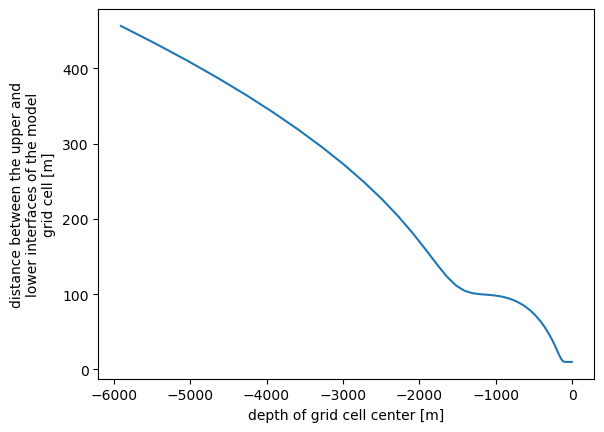

In [6]:
diva.drF.plot()

Text(0.45, 0.025, 'jkdfvnk')

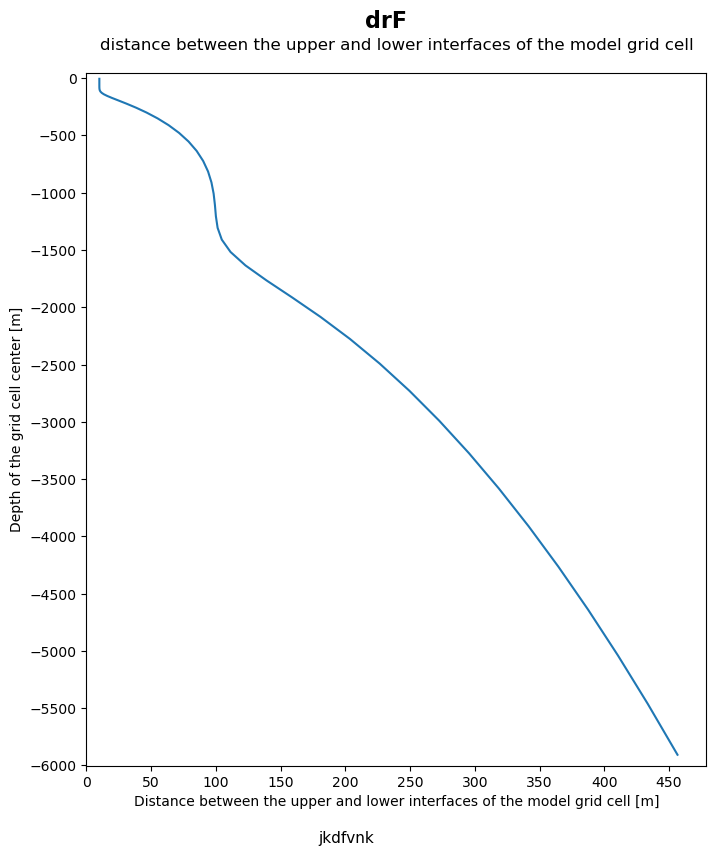

In [7]:
plt.figure(figsize=(8,9))
plt.plot(diva.drF,diva.Z)
plt.ylim(-6000.1,50);plt.xlim(0.490)
plt.yticks(-np.arange(0,6000.1,500))
plt.xticks(np.arange(0,490.1,50))
plt.xlabel(diva.drF.long_name.capitalize()+ " [m]",wrap=True)
plt.ylabel("Depth of the grid cell center [m]")
plt.suptitle(str(diva.drF.name),ha='center',x=.5,y=.95,weight='bold', fontsize=16)
plt.title(diva.drF.attrs["long_name"]+"\n", wrap=True, fontsize=12)
plt.figtext(0.45, 0.025,
                    s='jkdfvnk',
                    wrap=True,horizontalalignment='center', fontsize=11)

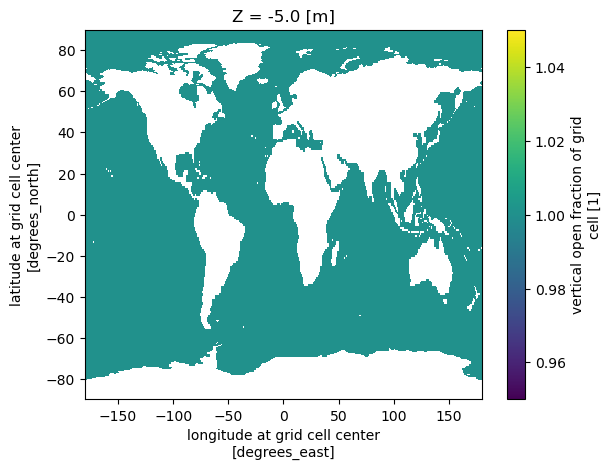

In [17]:
diva.hFacC[0,:,:].plot()

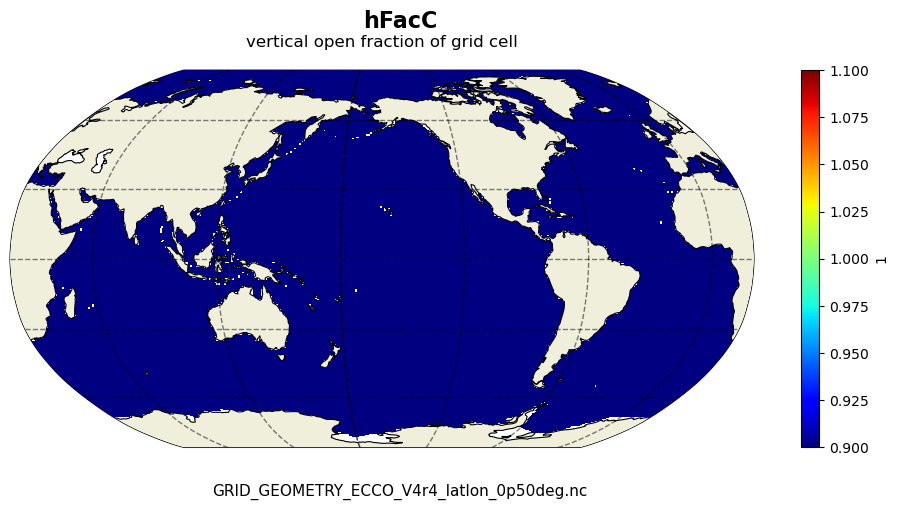

In [9]:
cdf_plotter_ojh.plot_latlon(ds=diva,
                           field=diva.hFacC,
                           dataseteName=diva.product_name,
                           show_colorbar=True)

In [25]:
import cdf_extract

In [ ]:
(ds:xr.Dataset, field:xr.DataArray, dataseteName:str, show_colorbar:bool=True, is_coord:bool=False)

In [24]:
# diva.attrs['product_name'].startswith('GRID_GEOMETRY_ECCO') and 'drF' in diva.data_vars
diva.attrs['product_name'].startswith('Boulshit') and 'drF' in diva.data_vars

False

In [19]:
diva.data_vars

Data variables:
    hFacC    (Z, latitude, longitude) float64 ...
    Depth    (latitude, longitude) float64 ...
    area     (latitude, longitude) float64 1.349e+07 1.349e+07 ... 1.349e+07
    drF      (Z) float32 ...
    maskC    (Z, latitude, longitude) bool ...

In [ ]:
# cdf_extract.
/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/granule_datasets/latlon_coords/GRID_GEOMETRY_ECCO_V4r4_latlon_0p50deg.nc")
diva

In [36]:
fieldS, dsS = cdf_extract.search_and_extract(substring="GRID_GEOMETRY_ECCO_V4r4_latlon_0p50deg.nc", 
                                             directory="/Users/houndegno/Documents/ECCO-PROD/ECCO-Dataset-Production/document_generator/granule_datasets/latlon_coords/", 
                                             get_coords=False)

In [37]:
fieldS

[<xarray.DataArray 'Depth' (latitude: 360, longitude: 720)>
 [259200 values with dtype=float64]
 Coordinates:
   * latitude   (latitude) float32 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
   * longitude  (longitude) float32 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
 Attributes:
     _FillValue:             9.969209968386869e+36
     coverage_content_type:  modelResult
     long_name:              model seafloor depth below ocean surface at rest
     standard_name:          sea_floor_depth_below_geoid
     units:                  m
     comment:                Model sea surface height (SSH) of 0m corresponds ...,
 <xarray.DataArray 'area' (latitude: 360, longitude: 720)>
 [259200 values with dtype=float64]
 Coordinates:
   * latitude   (latitude) float32 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
   * longitude  (longitude) float32 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
 Attributes:
     _FillValue:             9.969209968386869e+36
     coverage_content_type:  modelResult
     lon

In [33]:
DS

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, tile: 13, time: 1, nv: 2, nb: 4)
Coordinates: (12/13)
  * i          (i) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j          (j) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int32 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int32 0 1 2 3 4 5 6 7 8 9 10 11 12
  * time       (time) datetime64[ns] 2017-12-29T12:00:00
    ...         ...
    YC         (tile, j, i) float32 ...
    XG         (tile, j_g, i_g) float32 ...
    YG         (tile, j_g, i_g) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
    XC_bnds    (tile, j, i, nb) float32 ...
    YC_bnds    (tile, j, i, nb) float32 ...
Dimensions without coordinates: nv, nb
Data variables:
    EXFatemp   (time, tile, j, i) float32 ...
    EXFaqh     (time, tile, j, i) float32 ...
    EXFuwind   (time, tile, j, i) float32 ...
    EXFvwind   (time, tile, j, i) float32 ...
    EXFwspee   (time, tile, j, i) float32 ...
    EXFpress   (time, tile, j, i) float32 ...
Attributes: (12/57)
    acknowledgement:              This research was carried out by the Jet Pr...
    author:                       Ian Fenty and Ou Wang
    cdm_data_type:                Grid
    comment:                      Fields provided on the curvilinear lat-lon-...
    Conventions:                  CF-1.8, ACDD-1.3
    coordinates_comment:          Note: the global 'coordinates' attribute de...
    ...                           ...
    time_coverage_duration:       P1D
    time_coverage_end:            2017-12-30T00:00:00
    time_coverage_resolution:     P1D
    time_coverage_start:          2017-12-29T00:00:00
    title:                        ECCO Atmosphere Surface Temperature, Humidi...
    uuid:                         3525e4c8-404d-11eb-bf7a-0cc47a3f5049

In [35]:
DS.XC_bnds.attrs.items()

dict_items([('comment', "Bounds array follows CF conventions. XC_bnds[i,j,0] = 'southwest' corner (j-1, i-1), XC_bnds[i,j,1] = 'southeast' corner (j-1, i+1), XC_bnds[i,j,2] = 'northeast' corner (j+1, i+1), XC_bnds[i,j,3]  = 'northwest' corner (j+1, i-1). Note: 'southwest', 'southeast', northwest', and 'northeast' do not correspond to geographic orientation but are used for convenience to describe the computational grid. See MITgcm dcoumentation for details."), ('coverage_content_type', 'coordinate'), ('long_name', 'longitudes of tracer grid cell corners')])

In [113]:
temp = {"name"+'-Coovi-'+k:str(v).replace(',','I will have a job soon').replace('_',' ') for (k,v) in DS.EXFatemp.attrs.items() if k != 'comment'}
mykeys = sorted(list(temp.keys()));sd = {i: temp[i] for i in mykeys}
sd,temp

({'name-Coovi-coverage_content_type': 'modelResult',
  'name-Coovi-long_name': 'Atmosphere surface (2 m) air temperature ',
  'name-Coovi-standard_name': 'air temperature',
  'name-Coovi-units': 'degree K',
  'name-Coovi-valid_max': '312.8451232910156',
  'name-Coovi-valid_min': '195.37054443359375'},
 {'name-Coovi-long_name': 'Atmosphere surface (2 m) air temperature ',
  'name-Coovi-units': 'degree K',
  'name-Coovi-coverage_content_type': 'modelResult',
  'name-Coovi-standard_name': 'air temperature',
  'name-Coovi-valid_min': '195.37054443359375',
  'name-Coovi-valid_max': '312.8451232910156'})

In [76]:
temp['name-Coovi-units'] = temp['name-Coovi-units']+'dfe'
'name-Coovi-units' in temp

True

In [68]:
sd['name-Coovi-units'] = sd['name-Coovi-units']+' Victory'
sd['name-Coovi-units'].replace('Victory','\n ')

'degree K \n '

In [101]:
r'\textcolor{white}{.} '+str(temp)

"\\textcolor{white}{.} {'name-Coovi-long_name': 'Atmosphere surface (2 m) air temperature ', 'name-Coovi-units': 'degree Kdfedfedfe', 'name-Coovi-coverage_content_type': 'modelResult', 'name-Coovi-standard_name': 'air temperature', 'name-Coovi-valid_min': '195.37054443359375', 'name-Coovi-valid_max': '312.8451232910156'}"

In [114]:
Last_key = list(temp.keys())[-1]
# if name+'-Coovi-Paul-Houndegnonto-units' in temp:
temp[Last_key] = str(temp[Last_key])+' Victory'
temp[Last_key]

'312.8451232910156 Victory'